Import Libraries

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, r2_score

Load the clean dataset, not log_transformed (adapted for tree-based models)

In [ ]:
df = pd.read_csv('../data/clean_tree.csv')  
df.head()

,price,mileage,tax,mpg,engineSize,car_age,model_freq,brand_BMW,brand_Mercedes,brand_VW,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,11995.0,22606,30,57.6,1.4,9,709,False,False,False,True,False,False,False,True
1,6000.0,129680,30,64.2,2.0,12,734,False,False,False,True,False,False,False,False
2,13920.0,47576,20,67.3,2.0,9,2532,False,False,True,True,False,False,False,False
3,10600.0,30983,30,53.3,1.4,10,2532,False,False,True,True,False,False,False,True
4,21699.0,5229,145,43.5,1.5,6,2532,False,False,True,False,True,False,False,True


Define features and target variable

In [ ]:
X = df.drop(columns=['price'])  
y = df['price']                 

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Train initial Random Forest \
We start with default/random parameters to get a baseline performance.

In [8]:
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

Evaluation of the baseline random forest model, using R^2 and RMSE to assess its performance on the validation set

In [9]:
y_pred = rf.predict(X_val)

rmse = root_mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Random Forest RMSE: ${rmse:.2f}")
print(f"Random Forest R² Score: {r2:.3f}")

Random Forest RMSE: $2067.03
Random Forest R² Score: 0.949


Random Forest RMSE: $2067.03 \
Random Forest R² Score: 0.949

Feature importance visualisation - top 15 features used by the model for the predictions

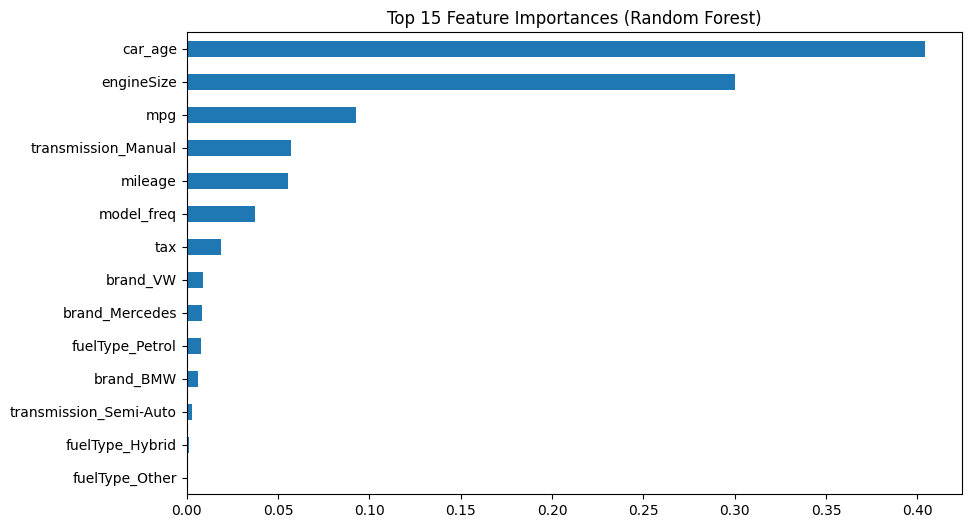

In [10]:
import matplotlib.pyplot as plt

feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = feature_importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
top_features.plot(kind='barh')
plt.title("Top 15 Feature Importances (Random Forest)")
plt.gca().invert_yaxis()
plt.show()

Imports for model tuning

In [11]:
from sklearn.model_selection import GridSearchCV
import numpy as np

Define parameter grid to test multiple values for each hyperparameter in order to optimize the model.

In [12]:
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [1, 3],
    'max_features': ['sqrt', 'log2']
}

We run 5-fold cross validation for all hyperparameter combinations

In [13]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',  # minimize RMSE
    verbose=2,
    n_jobs=-1,
    return_train_score=True
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, n_estimators=100; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=3, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=3, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=3, n_estimators=100; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=3, n_estimators=100; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_s

/Users/leonardogonnelli/Desktop/Business Analytics and Data Science/Assignments/Assignment 2/.venv/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, n_estimators=100; total time=   0.9s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, n_estimators=100; total time=   1.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, n_estimators=100; total time=   0.9s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, n_estimators=100; total time=   0.9s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=3, n_estimators=100; total time=   0.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=3, n_estimators=100; total time=   0.5s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=3, n_estimators=100; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=3, n_estimators=100; total time=   0.5s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, n_estimators=300; total time=   2.6s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, n_estimators=300; total time=   3.0s
[CV] END m

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 3],
                         'n_estimators': [100, 300]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

Once the best model found, we evaluate it to predict on the validation set. \
Best parameters:
{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 300}

In [14]:
print("Best parameters:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_

# Predict on validation set
y_pred = best_model.predict(X_val)

# Metrics
rmse = root_mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Tuned Random Forest RMSE: ${rmse:.2f}")
print(f"Tuned Random Forest R² Score: {r2:.3f}")

Best parameters:
{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 300}
Tuned Random Forest RMSE: $1995.52
Tuned Random Forest R² Score: 0.953


Tuned Random Forest RMSE: $1995.52
Tuned Random Forest R² Score: 0.953

We save the tuned Random Forest model 

In [15]:

from joblib import dump

# Save the best model from grid search
dump(best_model, '../Results/random_forest_model.joblib')

['../Results/random_forest_model.joblib']